In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Load & Analyze Dataset

In [2]:
# Load dataset
df = pd.read_csv("patient_churn_dataset.csv")
df.head()

,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1


In [3]:
# Dataset infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   Gender                      2000 non-null   object 
 3   State                       2000 non-null   object 
 4   Tenure_Months               2000 non-null   int64  
 5   Specialty                   2000 non-null   object 
 6   Insurance_Type              2000 non-null   object 
 7   Visits_Last_Year            2000 non-null   int64  
 8   Missed_Appointments         2000 non-null   int64  
 9   Days_Since_Last_Visit       2000 non-null   int64  
 10  Last_Interaction_Date       2000 non-null   object 
 11  Overall_Satisfaction        2000 non-null   float64
 12  Wait_Time_Satisfaction      2000 non-null   float64
 13  Staff_Satisfaction          2000 

In [4]:
# Shape of the Dataset
print("Total number of columns: ", df.shape[1])
print("Total number of records: ", df.shape[0])

Total number of columns:  21
Total number of records:  2000


## 2. Pre-processing

In [5]:
# Missing values in dataset
print("Total number of missing values in each column: ")
df.isnull().sum()

Total number of missing values in each column: 


,0
PatientID,0
Age,0
Gender,0
State,0
Tenure_Months,0
Specialty,0
Insurance_Type,0
Visits_Last_Year,0
Missed_Appointments,0
Days_Since_Last_Visit,0


In [6]:
# Dupliate values in dataset
print(f"Total number of duplicate records: {df.duplicated().sum()}")

Total number of duplicate records: 0


In [7]:
# Inspecting categorical columns
categorical_cols = ['Gender', 'State', 'Specialty', 'Insurance_Type']

for col in categorical_cols:
  print(f"Unique values in {col}:")
  print(df[col].value_counts())
  print("\n")

Unique values in Gender:
Gender
Male      1016
Female     984
Name: count, dtype: int64


Unique values in State:
State
NC    259
IL    214
FL    213
PA    205
NY    197
OH    193
CA    184
GA    181
TX    180
MI    174
Name: count, dtype: int64


Unique values in Specialty:
Specialty
General Practice     302
Family Medicine      289
Orthopedics          289
Neurology            286
Pediatrics           284
Internal Medicine    277
Cardiology           273
Name: count, dtype: int64


Unique values in Insurance_Type:
Insurance_Type
Self-Pay    523
Medicare    516
Private     483
Medicaid    478
Name: count, dtype: int64




In [8]:
# Inspecting numerical columns
numerical_cols = ['Age', 'Tenure_Months', 'Visits_Last_Year', 'Missed_Appointments',
       'Days_Since_Last_Visit', 'Overall_Satisfaction',
       'Wait_Time_Satisfaction', 'Staff_Satisfaction', 'Provider_Rating',
       'Avg_Out_Of_Pocket_Cost', 'Billing_Issues', 'Portal_Usage',
       'Referrals_Made', 'Distance_To_Facility_Miles', 'Churned']

for col in numerical_cols:
  print(col)
  print(f'Minimum value in {col}: ', df[col].min())
  print(f'Maximum value in {col}: ', df[col].max())
  print("\n")

Age
Minimum value in Age:  18
Maximum value in Age:  90


Tenure_Months
Minimum value in Tenure_Months:  1
Maximum value in Tenure_Months:  120


Visits_Last_Year
Minimum value in Visits_Last_Year:  0
Maximum value in Visits_Last_Year:  15


Missed_Appointments
Minimum value in Missed_Appointments:  0
Maximum value in Missed_Appointments:  5


Days_Since_Last_Visit
Minimum value in Days_Since_Last_Visit:  1
Maximum value in Days_Since_Last_Visit:  730


Overall_Satisfaction
Minimum value in Overall_Satisfaction:  1.5
Maximum value in Overall_Satisfaction:  5.0


Wait_Time_Satisfaction
Minimum value in Wait_Time_Satisfaction:  1.5
Maximum value in Wait_Time_Satisfaction:  5.0


Staff_Satisfaction
Minimum value in Staff_Satisfaction:  2.0
Maximum value in Staff_Satisfaction:  5.0


Provider_Rating
Minimum value in Provider_Rating:  2.5
Maximum value in Provider_Rating:  5.0


Avg_Out_Of_Pocket_Cost
Minimum value in Avg_Out_Of_Pocket_Cost:  20
Maximum value in Avg_Out_Of_Pocket_Cost:  199

In [9]:
# Convert Last_Interaction_Date to datetime
df['Last_Interaction_Date'] = pd.to_datetime(df['Last_Interaction_Date'])
# Extract year from Date
df['Last_Interaction_Year'] = df['Last_Interaction_Date'].dt.year
# Extract month from Date
df['Last_Interaction_Month'] = df['Last_Interaction_Date'].dt.month
# Extract day from Date
df['Last_Interaction_Day'] = df['Last_Interaction_Date'].dt.day
# Extract week from Date
df['Last_Interaction_Weekday'] = df['Last_Interaction_Date'].dt.weekday
# Remove Last_Interaction_Date from the Dataframe
df = df.drop(columns=['Last_Interaction_Date'])

## 3. Exploratory Data Analysis

### a. Patient Churn Distribution

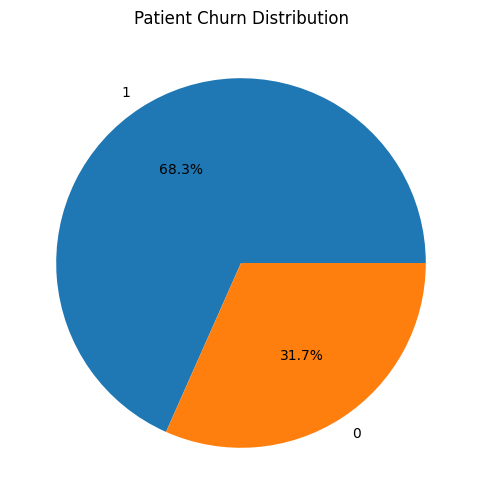

In [10]:
churn_count = df['Churned'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%')
plt.title("Patient Churn Distribution")
plt.show()

### b. Age Distribution by Churn Status

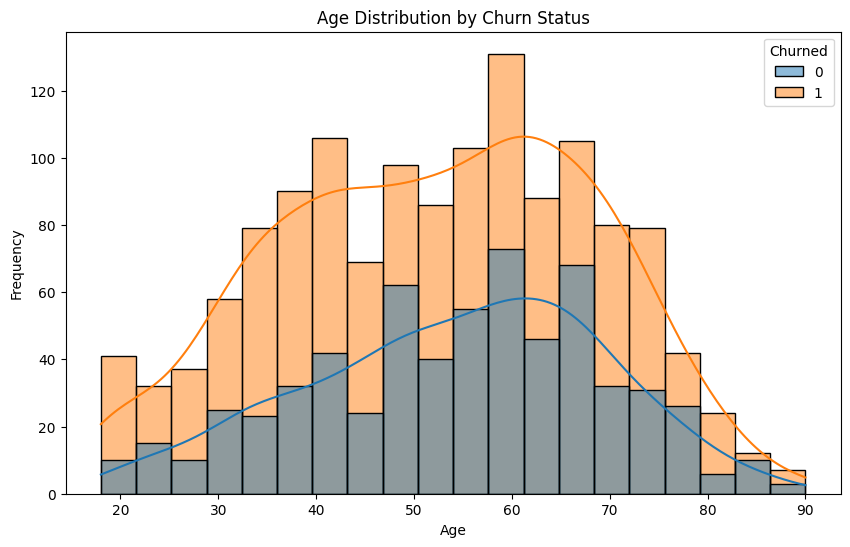

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Age'], hue=df['Churned'], bins=20, kde=True)
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### c. Churn Rate by Medical Specialty

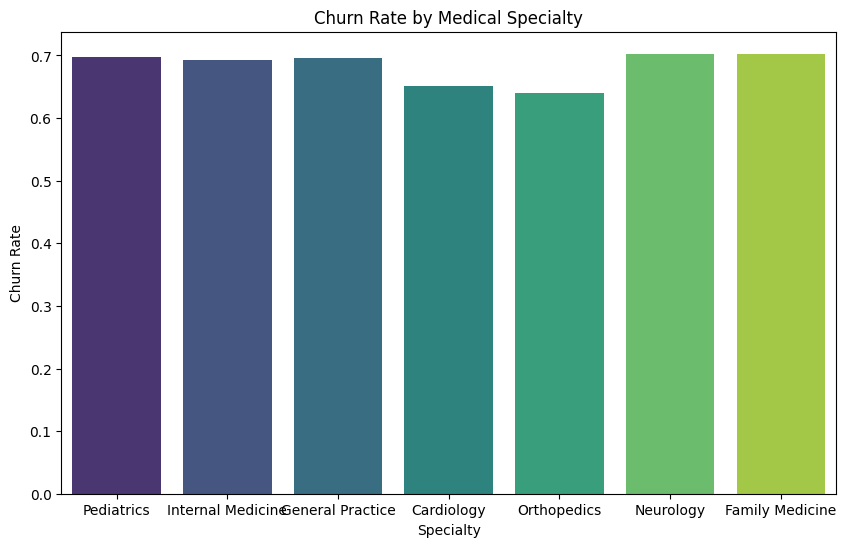

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Specialty'], y=df['Churned'], palette='viridis', errorbar=None)
plt.title("Churn Rate by Medical Specialty")
plt.xlabel("Specialty")
plt.ylabel("Churn Rate")
plt.show()

### d. Churn Rate by Insurance Type

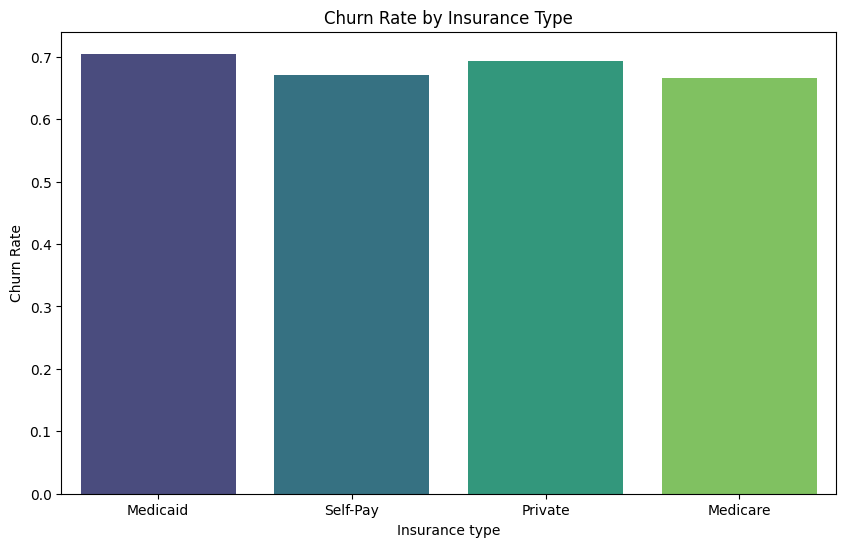

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Insurance_Type'], y=df['Churned'], palette='viridis', errorbar=None)
plt.title("Churn Rate by Insurance Type")
plt.xlabel("Insurance type")
plt.ylabel("Churn Rate")
plt.show()

### e. Churn Rate by State

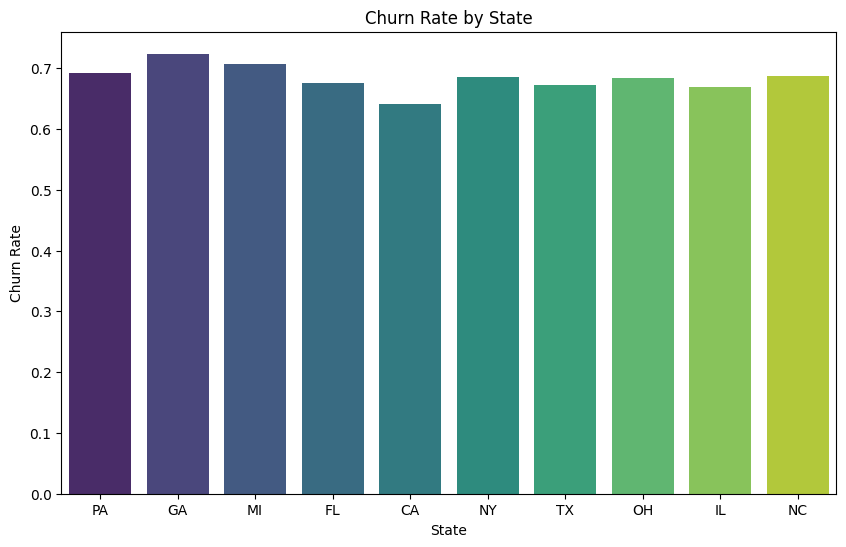

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['State'], y=df['Churned'], palette='viridis', errorbar=None)
plt.title("Churn Rate by State")
plt.xlabel("State")
plt.ylabel("Churn Rate")
plt.show()

### f. Tenure(Months) by Churn Status

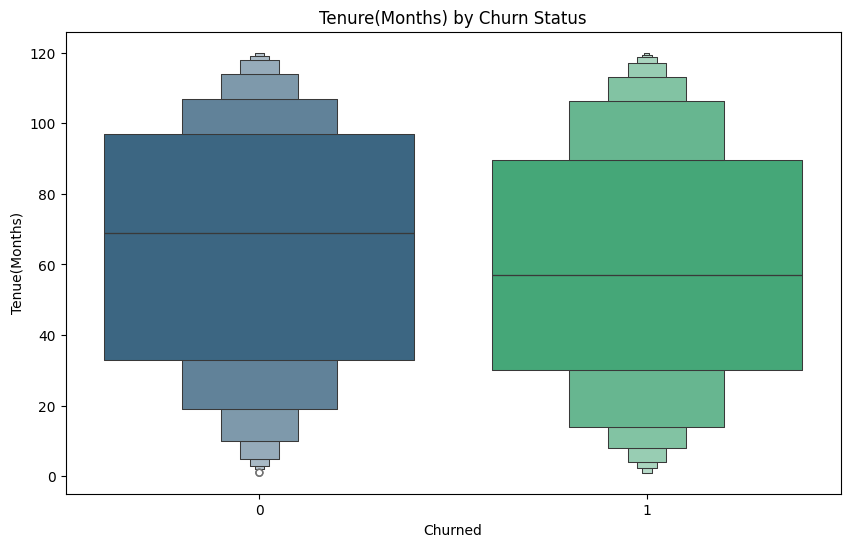

In [15]:
plt.figure(figsize=(10,6))
sns.boxenplot(x=df['Churned'], y=df['Tenure_Months'], palette='viridis')
plt.title("Tenure(Months) by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Tenue(Months)")
plt.show()

### g. Days Since Last Visit by Churn Status

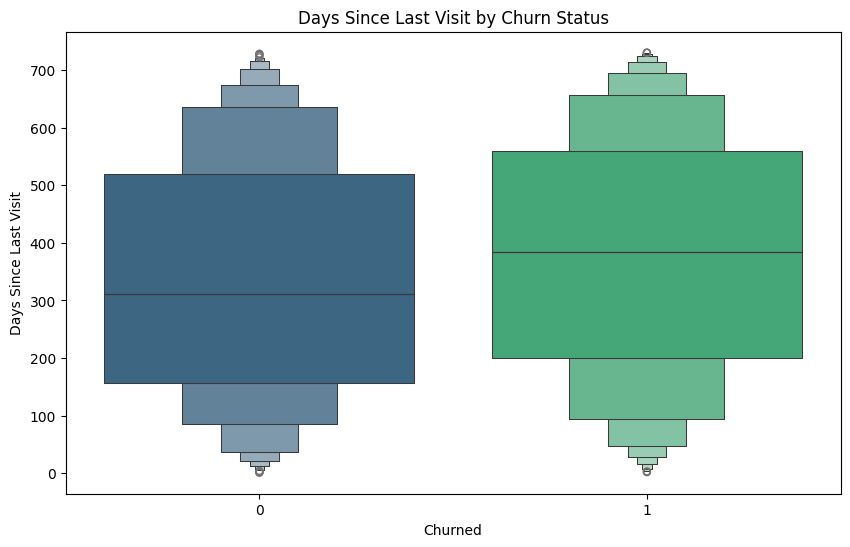

In [16]:
plt.figure(figsize=(10,6))
sns.boxenplot(x=df['Churned'], y=df['Days_Since_Last_Visit'], palette='viridis')
plt.title("Days Since Last Visit by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Days Since Last Visit")
plt.show()

### h. Churn Rate by Missed Appointment

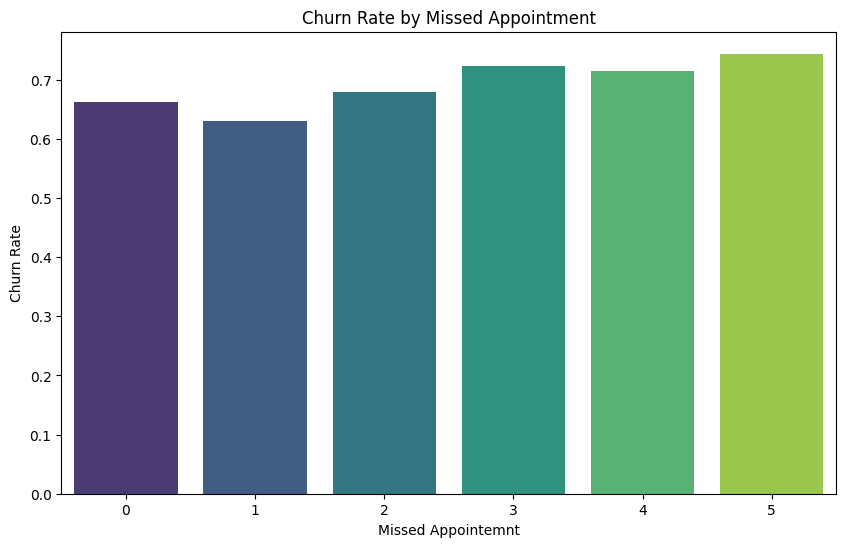

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Missed_Appointments'], y=df['Churned'], palette='viridis', errorbar=None)
plt.title("Churn Rate by Missed Appointment")
plt.xlabel("Missed Appointemnt")
plt.ylabel("Churn Rate")
plt.show()

### i. Overall_Satisfaction by Churn Status

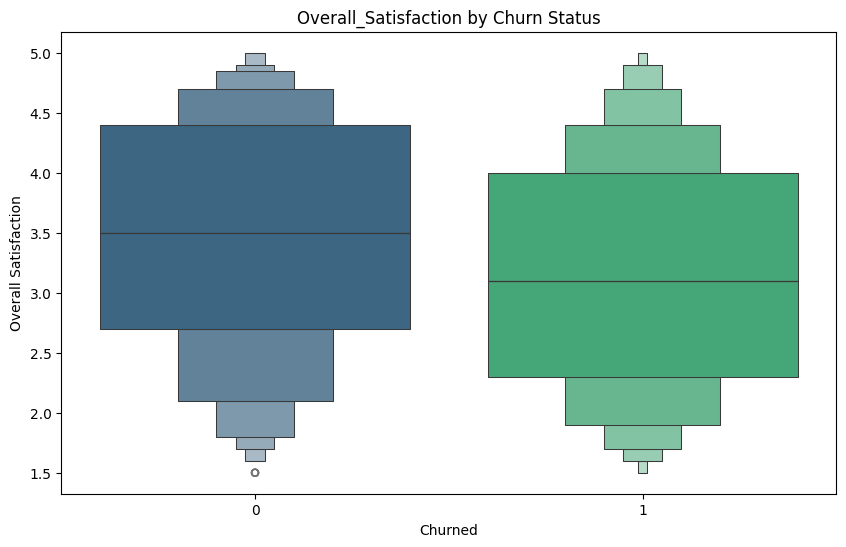

In [18]:
plt.figure(figsize=(10,6))
sns.boxenplot(x=df['Churned'], y=df['Overall_Satisfaction'], palette='viridis')
plt.title("Overall_Satisfaction by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Overall Satisfaction")
plt.show()

### j. Correlation Heatmap

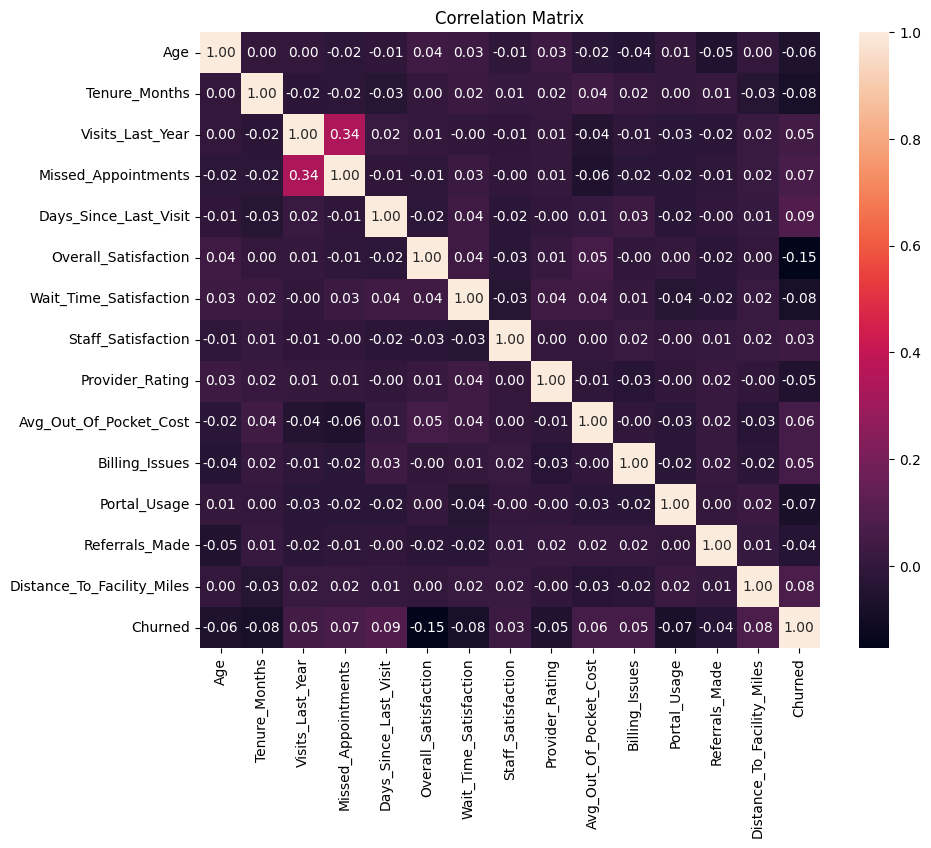

In [19]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()